In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import cv2
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
path_1 = '/kaggle/input/dip-images-3/imag21.png' # 3 ch
path_2 = '/kaggle/input/dip-images-3/imag12.png' # 1 ch

In [ ]:
img1 = cv2.imread(path_1, 0) 
  
# will show the image in a window 
plt.imshow(img1)

In [ ]:
img2 = cv2.imread(path_2) 
  
# will show the image in a window 
plt.imshow(img2[:, :, :])

**Image Registration**

In [122]:
import cv2 
import numpy as np 
  
# Open the image files. 
img1_color = cv2.imread(path_2)  # Image to be aligned. # 1 ch
img2_color = cv2.imread(path_1)    # Reference image.   # 3 ch
  
# Convert to grayscale. 
img1 = cv2.cvtColor(img1_color, cv2.COLOR_BGR2GRAY) 
img2 = cv2.cvtColor(img2_color, cv2.COLOR_BGR2GRAY) 
height, width = img2.shape
  
# Create ORB detector with 5000 features. 
orb_detector = cv2.ORB_create(5000) 
  
# Find keypoints and descriptors. 
# The first arg is the image, second arg is the mask 
#  (which is not reqiured in this case). 
kp1, d1 = orb_detector.detectAndCompute(img1, None) 
kp2, d2 = orb_detector.detectAndCompute(img2, None) 
  
# Match features between the two images. 
# We create a Brute Force matcher with  
# Hamming distance as measurement mode. 
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True) 
  
# Match the two sets of descriptors. 
matches = matcher.match(d1, d2) 
  
# Sort matches on the basis of their Hamming distance. 
matches.sort(key = lambda x: x.distance) 
  
# Take the top 90 % matches forward. 
matches = matches[:int(len(matches)*90)] 
no_of_matches = len(matches) 
  
# Define empty matrices of shape no_of_matches * 2. 
p1 = np.zeros((no_of_matches, 2)) 
p2 = np.zeros((no_of_matches, 2)) 
  
for i in range(len(matches)): 
    p1[i, :] = kp1[matches[i].queryIdx].pt 
    p2[i, :] = kp2[matches[i].trainIdx].pt 
    
# Find the homography matrix. 
homography, mask = cv2.findHomography(p1, p2, cv2.RANSAC) 
  
# Use this matrix to transform the 
# colored image wrt the reference image. 
transformed_img = cv2.warpPerspective(img1_color, 
                    homography, (width, height)) 
  
# Save the output. 
cv2.imwrite('output.jpg', transformed_img) 

True

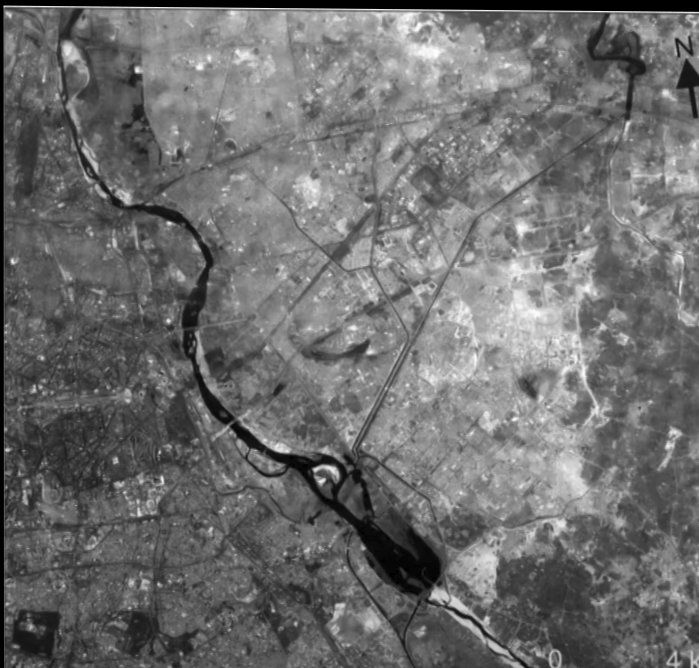

In [123]:
# transformed_img = transformed_img[:, : ,0]
transformed_img_ = Image.fromarray(transformed_img[:, :, 0])
transformed_img_

In [124]:
transformed_img.shape

(668, 699, 3)

In [125]:
img2_color.shape

(668, 699, 3)

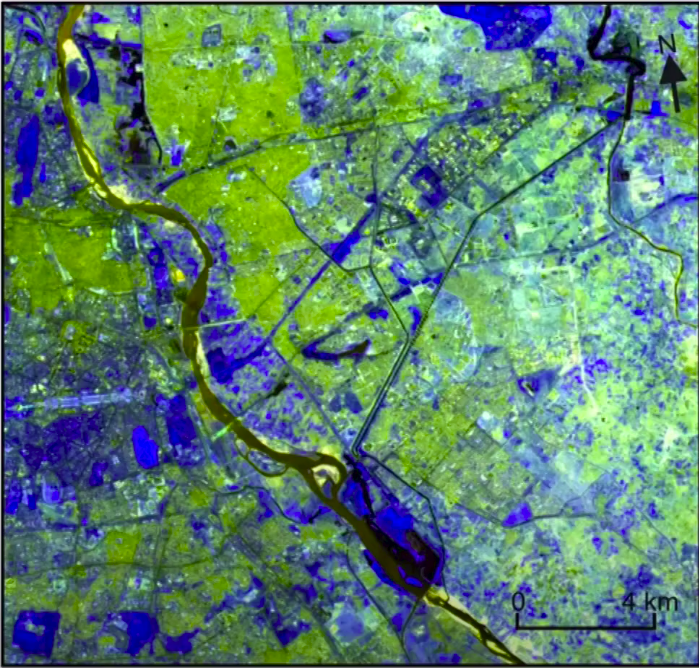

In [126]:
import cv2
img2_color = cv2.imread(path_1)    # Reference image.   # 3 ch
img2_color_ = Image.fromarray(img2_color)
img2_color_

**image conversion to HSI plane****

instead of python matab is generally more prefered for this transforation

In [129]:
import cv2
import numpy as np
def rgb2hsi (rgb_img):

    #Save the number of rows and columns of the original image
    row=np.shape (rgb_img) [0]
    col=np.shape (rgb_img) [1]
    #Copy the original image
    hsi_img=rgb_img.copy ()
    #Channel split the image
    b, g, r=cv2.split (rgb_img)
    #Normalize the channel to [0,1]
    [b, g, r]=[i/255.0 for i in ([b, g, r])]
    h=np.zeros ((row, col)) #define h channel
    i=(r + g + b)/3.0 #Calculate the i channel
    s=np.zeros ((row, col)) #define s channel
    for i in range (row):
        den=np.sqrt ((r [i] -g [i]) ** 2+ (r [i] -b [i]) * (g [i] -b [i]))
        thetha=np.arccos (0.5 * (r [i] -b [i] + r [i] -g [i])/den) #Calculate the angle
        h=np.zeros (col) #define temporary array
        #den>0 and g>= b element h is assigned thetha
        h [b [i]<= g [i]]=thetha [b [i]<= g [i]]
        #den>0 and the element h of g<= b is assigned thetha
        h [g [i]<b [i]]=2 * np.pi-thetha [g [i]<b [i]]
        #den<0's element h is assigned a value of 0
        h [den == 0]=0
        h [i]=h/(2 * np.pi) #Assign to h channel after radian
    #Calculate s channel
    for i in range (row):
        min=[]
        #Find the minimum value of each group of rgb values
        for j in range (col):
            arr=[b [i] [j], g [i] [j], r [i] [j]]
            min.append (np.min (arr))
        min=np.array (min)
        #Calculate s channel
        s [i]=1-min * 3/(r [i] + b [i] + g [i])
        #i is a value of 0 directly assigned 0
        s [i] [r [i] + b [i] + g [i] == 0]=0
    #Expand to 255 for easy display,Generally h component is between [0,2pi] and s and i are between [0,1]
    hsi_img [:,:, 0]=h * 255
    hsi_img [:,:, 1]=s * 255
    hsi_img [:,:, 2]=i * 255
    return hsi_img
def hsi2rgb (hsi_img):

    #Save the number of rows and columns of the original image
    row=np.shape (hsi_img) [0]
    col=np.shape (hsi_img) [1]
    #Copy the original image
    rgb_img=hsi_img.copy ()
    #Channel split the image
    h, s, i=cv2.split (hsi_img)
    #Normalize the channel to [0,1]
    [h, s, i]=[i/255.0 for i in ([h, s, i])]
    r, g, b=h, s, i
    for i in range (row):
        h=h [i] * 2 * np.pi
        #h is greater than or equal to 0 and less than 120 degrees
        a1=h>= 0
        a2=h<2 * np.pi/3
        a=a1 & a2 #fancy indexing in the first case
        tmp=np.cos (np.pi/3-h)
        b=i [i] * (1-s [i])
        r=i [i] * (1 + s [i] * np.cos (h)/tmp)
        g=3 * i [i] -r-b
        b [i] [a]=b [a]
        r [i] [a]=r [a]
        g [i] [a]=g [a]
        #h is greater than or equal to 120 degrees and less than 240 degrees
        a1=h>= 2 * np.pi/3
        a2=h<4 * np.pi/3
        a=a1 & a2 #fancy index for the second case
        tmp=np.cos (np.pi-h)
        r=i [i] * (1-s [i])
        g=i [i] * (1 + s [i] * np.cos (h-2 * np.pi/3)/tmp)
        b=3 * i [i]-r-g
        r [i] [a]=r [a]
        g [i] [a]=g [a]
        b [i] [a]=b [a]
        #h is greater than or equal to 240 degrees and less than 360 degrees
        a1=h>= 4 * np.pi/3
        a2=h<2 * np.pi
        a=a1 & a2 #fancy index in the third case
        tmp=np.cos (5 * np.pi/3-h)
        g=i [i] * (1-s [i])
        b=i [i] * (1 + s [i] * np.cos (h-4 * np.pi/3)/tmp)
        r=3 * i [i]-g-b
        b [i] [a]=b [a]
        g [i] [a]=g [a]
        r [i] [a]=r [a]
    rgb_img [:,:, 0]=b * 255
    rgb_img [:,:, 1]=g * 255
    rgb_img [:,:, 2]=r * 255
    return rgb_img

**to hsi**

In [130]:
from skimage.color import rgb2hsv, hsv2rgb

In [131]:
# hsi = rgb2hsi(img2_color)
hsi = rgb2hsv(img2_color)

**Replacing the I plane with high resolution image**

In [132]:
hsi[:, :, 2] = transformed_img[:, :, 0]

**Rverse transform**

In [133]:
# new_img = hsi2rgb(hsi)
new_img = hsv2rgb(hsi)
# new_img_ = Image.fromarray(new_img)
# new_img_

In [136]:
new_img.shape

(668, 699, 3)

In [138]:
new_img_ = Image.fromarray((new_img * 255).astype(np.uint8))
new_img_

**IMage Differnece**

Specify the paths

In [ ]:
path_2_1 = ""
path_2_2 = ""

In [ ]:
#pre
img1_color = cv2.imread(path_2_1)    # Reference image.   # 3 ch
#post
img2_color = cv2.imread(path_2_2)    # Reference image.   # 3 ch
# replace the red channel
img1_color[:, :, 0] = img2_color[:, :, 0]

plt.imshow(img1_color)


**for water detection**

In [ ]:
#pre
img1_color = cv2.imread(path_2_1)    # Reference image.   # 3 ch
#post
img2_color = cv2.imread(path_2_2)    # Reference image.   # 3 ch
# replace the g and b channel
img1_color[:, :, 1:] = img2_color[:, :, 1:]

plt.imshow(img1_color)